In [75]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [51]:
df = pd.read_csv('set4_dataviz.csv')
df.head()

,set4_id,DataVizRoles_collapsed,YearsDataVizExperience_buckets,DataVizCentralityFreelance,ToolsChoiceFreelance,ToolsUnchoiceProblemsFreelance_,ToolsUnchoiceProblemsFreelance_PoorCustomization,ToolsUnchoiceProblemsFreelance_MisfitForTask,ToolsUnchoiceProblemsFreelance_CostsAndOrLicenseIssues,ToolsUnchoiceProblemsFreelance_PerformanceIssues,...,DataVizSharingChannels_NewspaperorMagazine,DataVizSharingChannels_PeerReviewedJournal,DataVizSharingChannels_PrintedOnPaper,DataVizSharingChannels_OtherPhysicalMedium,DataVizSharingChannels_VRorAR,DataVizSharingChannels_Installation,DataVizSharingChannels_App,DataVizSharingChannels_Video,DataVizSharingChannels_SocialMedia,DataVizSharingChannels_Other__
0,URFe,Employee,1-5,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],x,[^not chosen],[^not chosen],x,[^not chosen],x,[^not chosen],[^not chosen],[^not chosen]
1,aOWX,EmployeeANDFreelanceAND,6-10,Data visualization is an important secondary p...,I’m able to choose my own tools.,0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen]
2,ggnG,Freelance,6-10,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,x,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen]
3,ATKe,FreelanceAND,16-20,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen]
4,bDAh,Academic,6-10,[\unasked],[\unasked],0.0,[\unasked],[\unasked],[\unasked],[\unasked],...,[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],[^not chosen],x,[^not chosen]


In [52]:
columns = [col for col in df.columns if 'ToolsFreq' in col]
columns.insert(0, 'set4_id')
tools = df[columns]
columns[0] = 'id'
columns[1] = 'ToolCount'
columns = [item.replace("ToolsFreq_", "") for item in columns]
tools.columns = columns
tools = tools.dropna(subset=['id'])
tools.head()

,id,ToolCount,ArcGIS,Canva,Canvas,D3,Datawrapper,Excel,Figma,Flourish,...,Qlik,R,RAWGraphs,React,Svelte,Tableau,Vega,Vue,WebComponents,WebGL
0,URFe,22.0,Rarely,Never,Often,Sometimes,Never,Often,Often,Never,...,Never,Rarely,Never,Often,Sometimes,Never,Never,Rarely,Often,Often
1,aOWX,12.0,Never,Rarely,Never,Never,Never,Often,Never,Never,...,Never,Rarely,Never,Never,Never,Sometimes,Never,Never,Never,Never
2,ggnG,25.0,Never,Never,Rarely,Sometimes,Sometimes,Never,Rarely,Sometimes,...,Never,Rarely,Rarely,Often,Never,Never,Never,Sometimes,Often,Sometimes
3,ATKe,15.0,Never,Rarely,Never,Never,Rarely,Often,Sometimes,Never,...,Never,Never,Sometimes,Never,Never,Rarely,Never,Never,Never,Never
4,bDAh,14.0,Never,Sometimes,Never,Never,Never,Often,Never,Sometimes,...,Never,Rarely,Rarely,Never,Rarely,Sometimes,Never,Never,Never,Never


In [61]:
pivot_columns = columns[2:]
unpivoted_df = pd.melt(tools, id_vars=['id', 'ToolCount'], value_vars=pivot_columns, var_name='Tool', value_name='Usage')
unpivoted_df

,id,ToolCount,Tool,Usage
0,URFe,22.0,ArcGIS,Rarely
1,aOWX,12.0,ArcGIS,Never
2,ggnG,25.0,ArcGIS,Never
3,ATKe,15.0,ArcGIS,Never
4,bDAh,14.0,ArcGIS,Never
...,...,...,...,...
32148,LhDb,0.0,WebGL,[\unfinished]
32149,sJmx,0.0,WebGL,[\unfinished]
32150,ZWON,33.0,WebGL,Sometimes
32151,PWvF,2.0,WebGL,Never


In [66]:
usage_df = unpivoted_df.pivot_table(values='id', index='Tool', columns='Usage', aggfunc='nunique').reset_index()
usage_df

Usage,Tool,Never,Often,Rarely,Sometimes,[\unfinished],[^not chosen]
0,ArcGIS,482,20,81,52,126,108
1,Canva,410,31,118,90,126,94
2,Canvas,517,22,48,37,126,119
3,D3,412,89,84,60,126,98
4,Datawrapper,441,39,84,59,126,120
5,Excel,71,351,114,174,126,33
6,Figma,351,116,93,105,126,78
7,Flourish,483,43,50,57,126,110
8,Gephi,558,3,45,18,126,119
9,GoogleDataStudio,496,23,70,40,126,114


In [71]:
plot_df = usage_df[['Tool', 'Often', 'Sometimes', 'Rarely']]
plot_df['Total'] = plot_df['Often'] + plot_df['Sometimes'] + plot_df['Rarely']
plot_df = plot_df.sort_values('Total', ascending=False)
plot_df

/var/folders/xr/rcl9nrcn11792st7djgvrh1r0000gn/T/ipykernel_24006/1213312271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Total'] = plot_df['Often'] + plot_df['Sometimes'] + plot_df['Rarely']


Usage,Tool,Often,Sometimes,Rarely,Total
5,Excel,351,174,114,639
19,PenPaper,192,238,137,567
23,PowerPoint,223,174,126,523
10,GoogleSheets,145,136,158,439
31,Tableau,208,81,129,418
24,Python,103,104,153,360
6,Figma,116,105,93,314
27,R,108,74,125,307
22,PowerBI,123,86,78,287
12,Illustrator,130,72,82,284


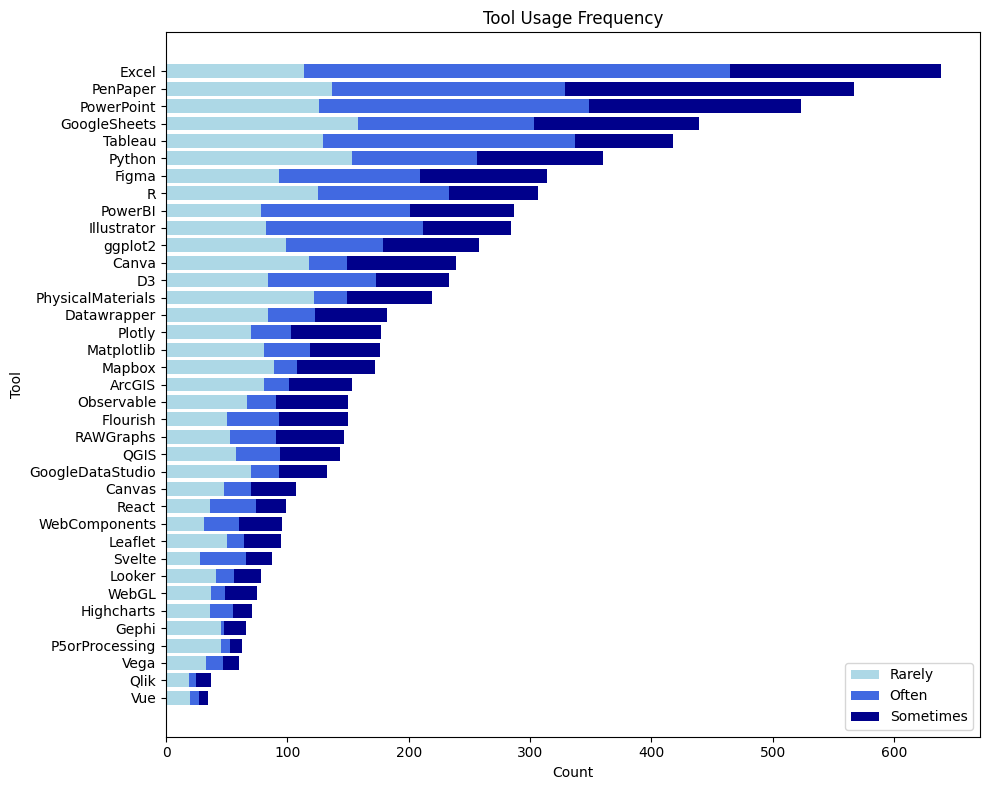

In [77]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed

# Create the stacked bar plot
ax.barh(plot_df['Tool'], plot_df['Rarely'], label='Rarely', color='lightblue')
ax.barh(plot_df['Tool'], plot_df['Often'], left=plot_df['Rarely'], label='Often', color='royalblue')
ax.barh(plot_df['Tool'], plot_df['Sometimes'], left=plot_df['Rarely'] + plot_df['Often'], label='Sometimes', color='darkblue')

# Customize the plot
ax.set_xlabel('Count')
ax.set_ylabel('Tool')
ax.set_title('Tool Usage Frequency')
ax.legend()

# Invert the y-axis to have the highest value at the top
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [78]:
plot_df.to_csv('tool_usage.csv', index=False)